In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:
print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

/var/folders/s1/8v_fjjr50mv4kq9jccj5h_880000gn/T/ipykernel_31522/519913112.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california['MEDV'], bins=30)


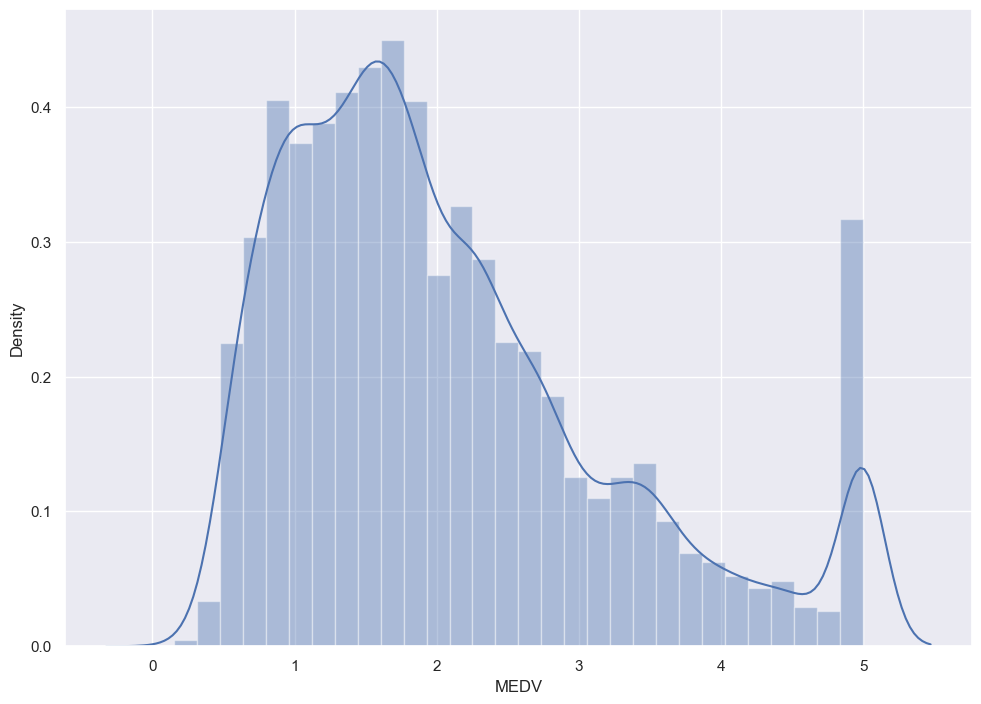

In [4]:
california = pd.DataFrame(housing.data, columns=housing.feature_names)
california .head()
california .isnull().sum()

california['MEDV'] = housing.target

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(california['MEDV'], bins=30)
plt.show()

<Axes: >

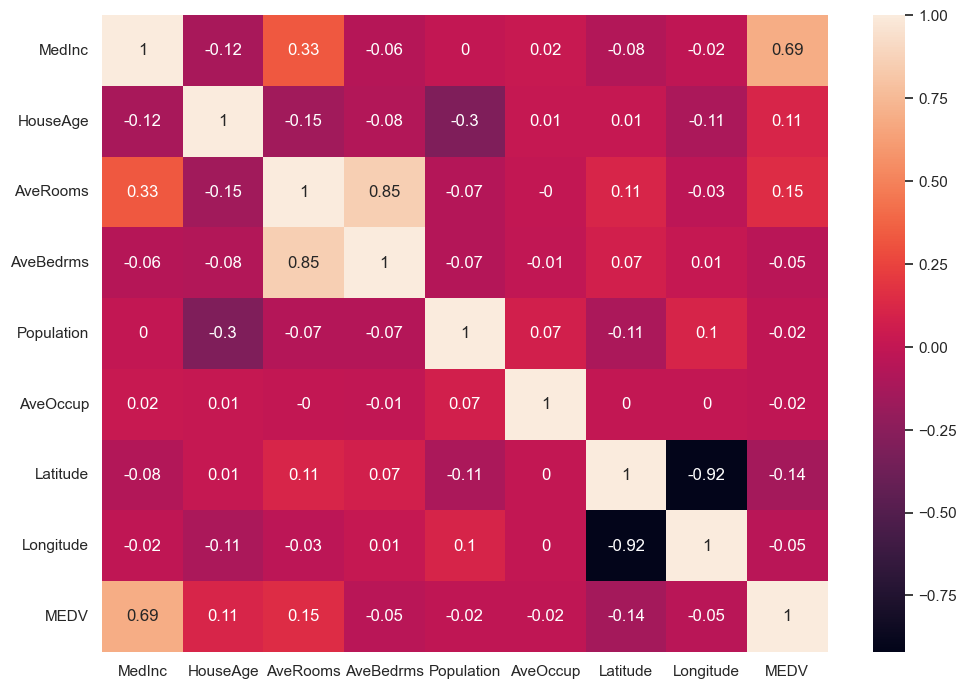

In [5]:
correlation_matrix = california.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

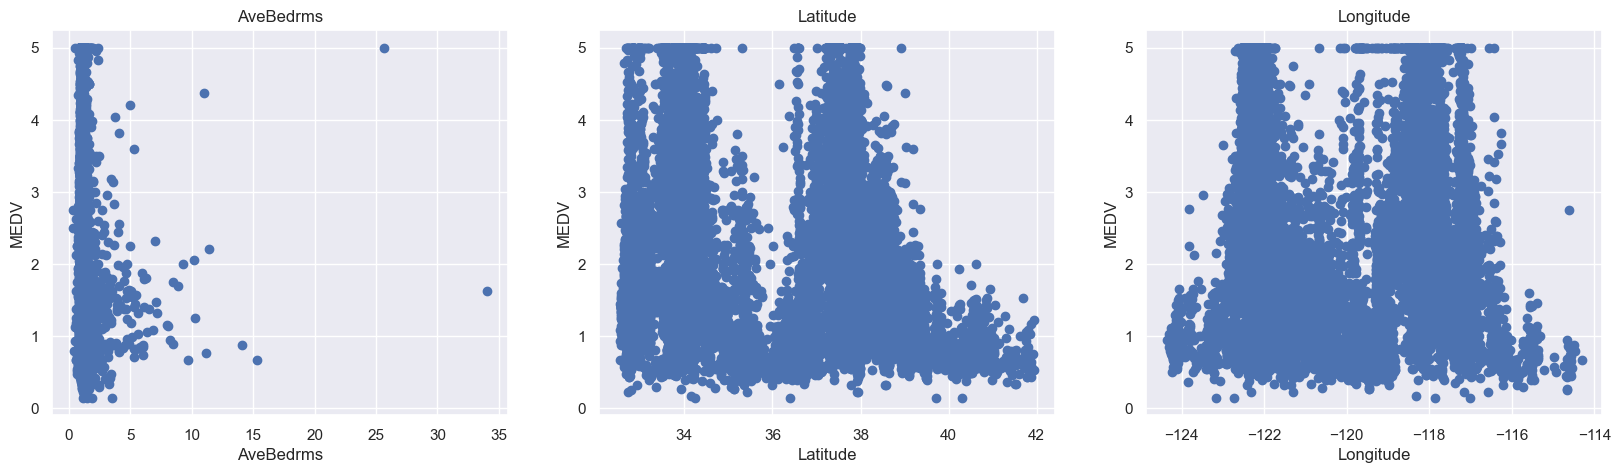

In [6]:
plt.figure(figsize=(20, 5))

#features = ['MedInc','AveBedrms','Latitude','Longitude']
features = ['AveBedrms','Latitude','Longitude']
target = california['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = california[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


In [7]:
X = pd.DataFrame(np.c_[#california['MedInc'],
                          california['AveBedrms'],
                          california['Latitude'],
                           california['Longitude']], columns = features)
Y = california['MEDV']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=6)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15480, 3)
(5160, 3)
(15480,)
(5160,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

The model performance for training set
--------------------------------------
RMSE is 1.0003198930540997
R2 score is 0.24680867774033488


The model performance for testing set
--------------------------------------
RMSE is 1.0067152219643882
R2 score is 0.2438808445754781


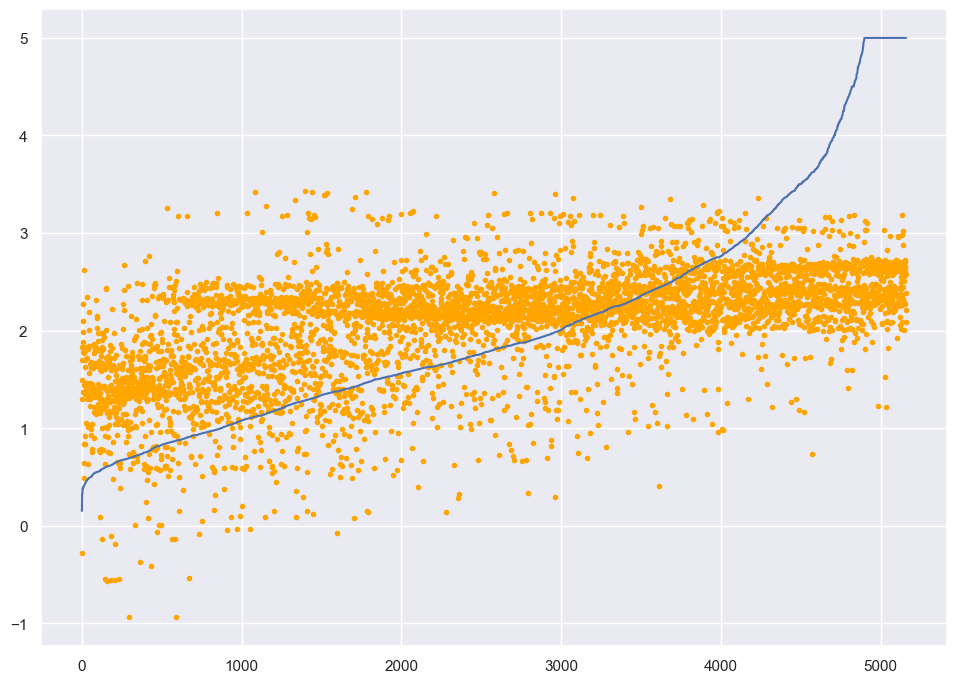

In [10]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

plt.plot(sorted(Y_test))
ind = np.argsort(Y_test)
plt.scatter(range(len(ind)),y_test_predict[ind],color="orange",marker = '.')
plt.show()

max depth: 10 

The model performance for training set
--------------------------------------
RMSE is 0.5747520769288337
R2 score is 0.7513499246227937


The model performance for testing set
--------------------------------------
RMSE is 0.6741286299465863
R2 score is 0.660950964353557




max depth: 12 

The model performance for training set
--------------------------------------
RMSE is 0.4712949128490074
R2 score is 0.8328089594825301


The model performance for testing set
--------------------------------------
RMSE is 0.6542799374726309
R2 score is 0.6806226031166003




max depth: 15 

The model performance for training set
--------------------------------------
RMSE is 0.3146566670947945
R2 score is 0.9254751049631493


The model performance for testing set
--------------------------------------
RMSE is 0.6921466146118612
R2 score is 0.6425846766893819






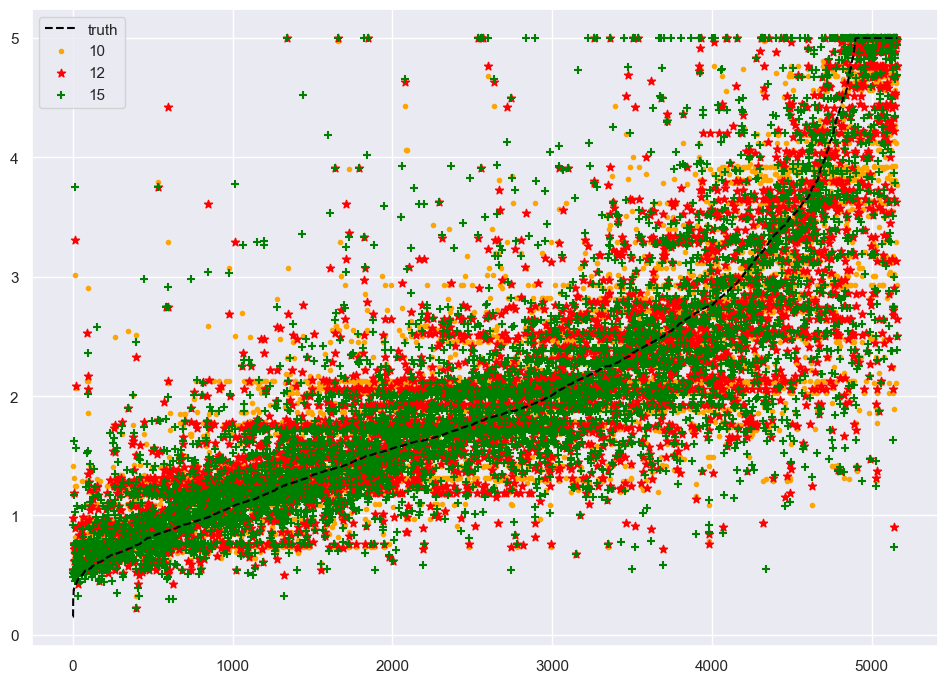

In [11]:
from sklearn.tree import DecisionTreeRegressor

plt.plot(sorted(Y_test),color="black",linestyle ='--', label="truth")
ind = np.argsort(Y_test)

# plt.scatter(range(len(ind)),y_test_predict[ind],color="blue",marker='>',label = 'linear')
# plt.show()
    
d = [10,12,15]
markers = ['.','*','+']
colors = ["orange","red","green"]
for  i in range(3):
    print('max depth:',d[i],'\n')
    regr = DecisionTreeRegressor(max_depth=d[i])
    regr.fit(X_train, Y_train)

    # model evaluation for training set
    y = regr.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y)))
    r2 = r2_score(Y_train, y)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y = regr.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y)))
    r2 = r2_score(Y_test, y)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    print("\n")

    
    plt.scatter(range(len(ind)),y[ind],color=colors[i],marker = markers[i],label = d[i])
    
plt.legend()  
plt.show()



max depth: 10 

The model performance for training set
--------------------------------------
RMSE is 0.5354797487464812
R2 score is 0.7841691115488311


The model performance for testing set
--------------------------------------
RMSE is 0.6215003841855258
R2 score is 0.7118226969156974




max depth: 12 

The model performance for training set
--------------------------------------
RMSE is 0.4402571416577007
R2 score is 0.8541050310708254


The model performance for testing set
--------------------------------------
RMSE is 0.5812320575494949
R2 score is 0.7479561592558001




max depth: 15 

The model performance for training set
--------------------------------------
RMSE is 0.31202757708522255
R2 score is 0.9267152764081138


The model performance for testing set
--------------------------------------
RMSE is 0.5524375018501418
R2 score is 0.7723103575022631






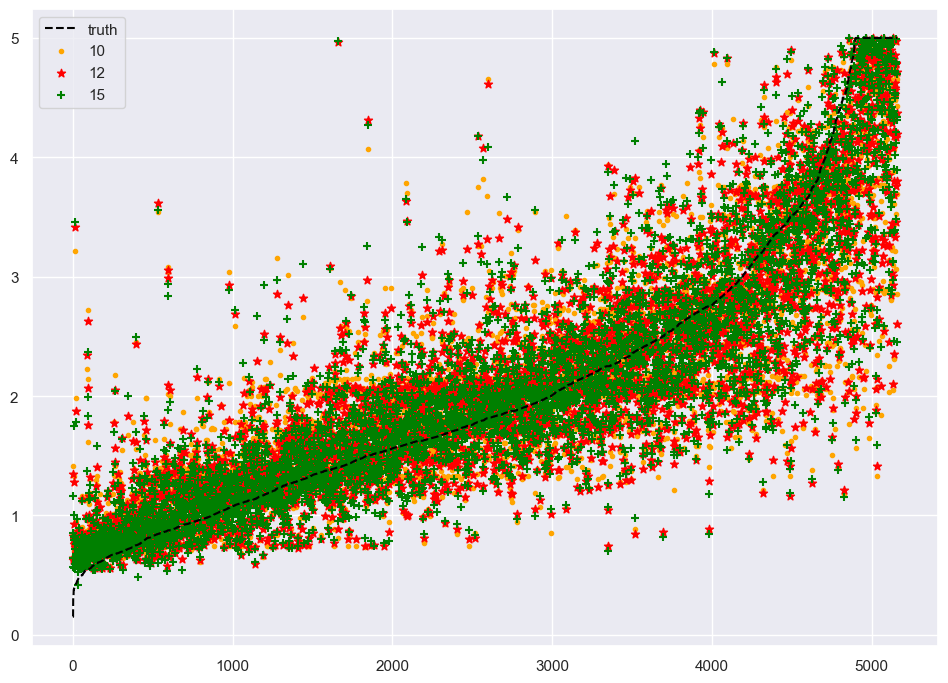

In [12]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.multioutput import MultiOutputRegressor


plt.plot(sorted(Y_test),color="black",linestyle ='--', label="truth")
ind = np.argsort(Y_test)

#plt.scatter(range(len(ind)),y_test_predict[ind],color="blue",marker='>',label = 'linear')

    
d = [10,12,15]
markers = ['.','*','+']
colors = ["orange","red","green"]
for  i in range(3):
    print('max depth:',d[i],'\n')
    regr_rf = RandomForestRegressor(n_estimators=50, max_depth=d[i],
                                random_state=2)
    regr_rf.fit(X_train, Y_train)

    # model evaluation for training set
    y = regr_rf.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y)))
    r2 = r2_score(Y_train, y)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y = regr_rf.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y)))
    r2 = r2_score(Y_test, y)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    print("\n")

    
    plt.scatter(range(len(ind)),y[ind],color=colors[i],marker = markers[i],label = d[i])
plt.legend()  
plt.show()